In [1]:
import matplotlib.pylab as pyl

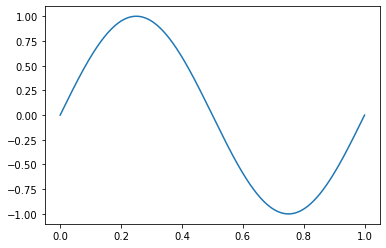

In [9]:
# time between samples
sampling_period = 0.0001

ts = pyl.arange(0, 1, sampling_period)

# This is the orginal signal 
ym = pyl.sin(2.0 * pyl.pi * 1.0 * ts)

# show the orginal graph
pyl.plot(ts, ym)
pyl.show()

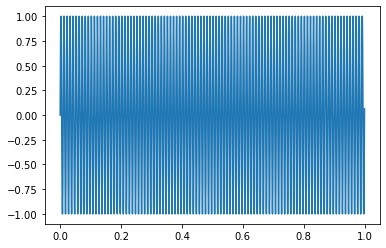

In [11]:
# High frequency carrier with slider pos encoded into it's frequency

# Demod doesn't solve for negative values, so make information signal positve
ym = ym + 1 # later we will minus 1

# Carrier properties
fc = 100.0 # frenquency

# Let T represent the period
T = 1 / fc

mod_fact = 1.0 / 100.0 # modulation factor
original_theta = 2.0 * pyl.pi * (fc + mod_fact * ym) * ts
yc = pyl.sin(original_theta)

# show the FM signal
pyl.plot(ts, yc)
pyl.show()

# arcsin function
theta =pyl.arcsin(yc)

# Calculate the samples per quadrant
N = T/sampling_period
Nq = int(N/4)

In [4]:
# Solve the angles for Yc^s 1st cycle
quadrant1_theta = theta[0:Nq]
quadrant2_theta = pyl.pi - theta[Nq:Nq*2]
quadrant3_theta = pyl.pi - theta[Nq*2:Nq*3]
quadrant4_theta = 2.0 * pyl.pi + theta[Nq*3:Nq*4]
theta_corrected = pyl.hstack((quadrant1_theta, quadrant2_theta, quadrant3_theta, quadrant4_theta))

number_of_cycles = fc  

In [6]:
# preparation for Runing loop
cycle = 1
pi_multiple = 2.0
cycle_start_index = Nq*4
N = int(N)

# loop
while cycle < number_of_cycles:
        
    # Calculate which sample falls into what quadrant
    quad1_start = cycle_start_index
    quad1_end = quad1_start + Nq
    
    quad23_start = quad1_end
    quad23_end = quad23_start + Nq * 2
    
    quad4_start = quad23_end
    quad4_stop = quad4_start + Nq
    
    # Solve for the angles for Yc's 2nd, 3rd, ... cycles
    quadrant1_theta = theta[quad1_start:quad1_end] + pi_multiple * pyl.pi 
    quadrant23_theta = pyl.pi - theta[quad23_start:quad23_end] + pi_multiple * pyl.pi
    quadrant4_theta = 2.0 * pyl.pi + theta[quad4_start:quad4_stop] + pi_multiple * pyl.pi 
    theta_corrected = pyl.hstack((theta_corrected, quadrant1_theta, quadrant23_theta, quadrant4_theta))
    
    cycle = cycle + 1
    
    
    # Calculate a distinct offset for each cycle 
    pi_multiple = pi_multiple + 2.0
    
    cycle_start_index = cycle_start_index + N


In [7]:
# THE key formula is suitable for demodulation for FM
ym_demod = theta_corrected / (2.0 * pyl.pi * ts *  mod_fact) - fc / mod_fact

# Remove offset that was added before modulation
ym_demod = ym_demod - 1

/var/folders/n4/p17_rp3120xdss8df_zjf4n80000gn/T/ipykernel_30238/2465692808.py:2: RuntimeWarning: invalid value encountered in true_divide
  ym_demod = theta_corrected / (2.0 * pyl.pi * ts *  mod_fact) - fc / mod_fact


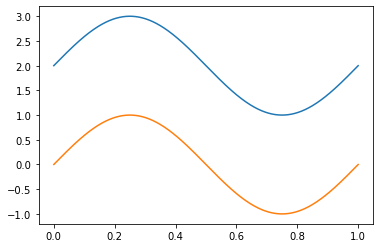

In [12]:
pyl.plot(ts,ym)
pyl.plot(ts, ym_demod)
pyl.show()